In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [3]:
# Load Datasets from downloaded csv files
train_data = pd.read_csv('data/cs-training.csv')
test_data = pd.read_csv('data/cs-test.csv')

# EDA (Exploratory Data Analysis)

In [4]:
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
test_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [6]:
# Drop the 'Unnamed: 0' column from both datasets as it corresponds to client ID which is not relevant for the prediction
train_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [8]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


This first description showcases some anomalies in our dataset :
- Unsual Distribution :
    - RevolvingUtilizationOfUnsecuredLines : Big difference between maximum value and Q3 (75%)
    - NumberOfTime30-59DaysPastDueNotWorse : Big difference in quartile distribution
    - DebtRatio : Big difference between maximum value and Q3 (75%)
    - NumberOfTimes90DaysLate : Big difference in quartile distribution
    - NumberOfTime60-89DaysPastDueNotWorse : Big difference in quartile distribution
    - NumberOfDependents : Big difference between maximum value and Q3 (75%)

Need further analysis to draw conclusions. We will explore data distribution using boxplot and scatterplot.
<br>
- Abnormal values :
    - Age : Minimum value : 0 => Drop lines where age < 18 (you cannot have a credit before 18).

In [9]:
# Check for missing values in train dataset
train_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [10]:
# Check for missing values in test dataset
test_data.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

For both training and test datasets the columns 'MonthlyIncome' and 'NumberOfDependents' contain Null values.
<br>Thus we will replace them coherently

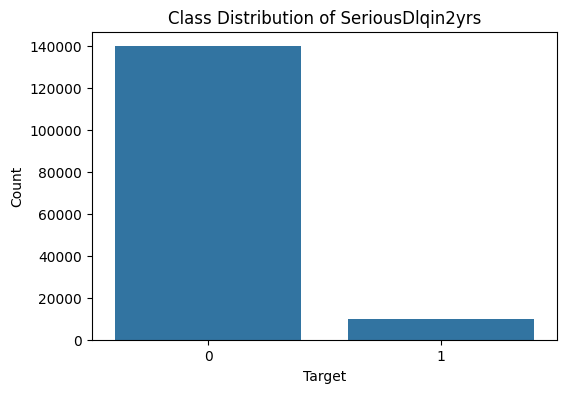

In [11]:
# Target Distribution ('SeriousDlqin2yrs')
target_counts = train_data['SeriousDlqin2yrs'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Class Distribution of SeriousDlqin2yrs")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

<br>The target distribution is very imbalanced, thus we cannot use classic evaluation metrics to evaluate the precision of our model.
<br>We will see further what metric to choose to evaluate our model's performance.

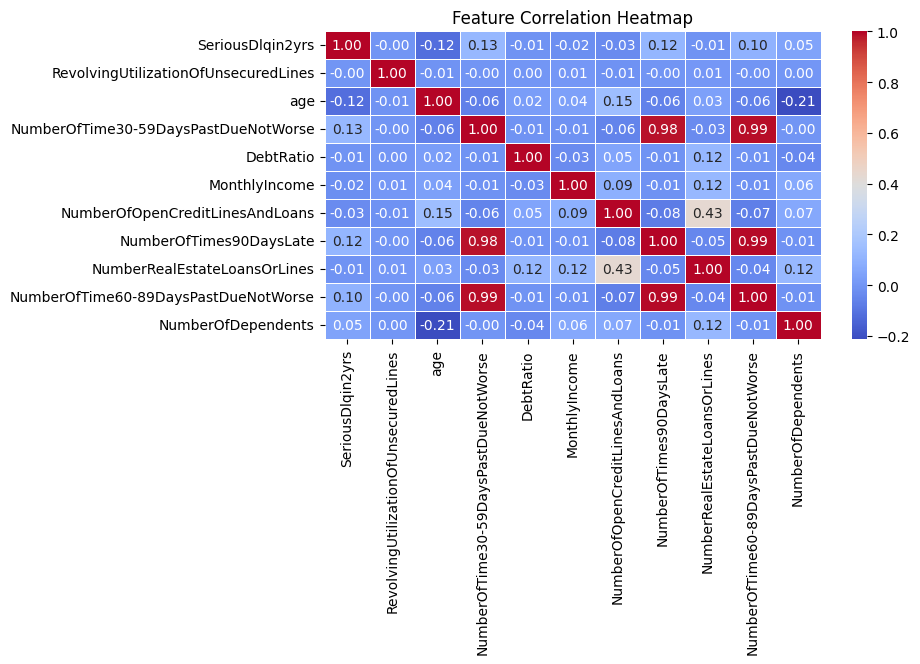

In [12]:
# Correlation heatmap of the features
plt.figure(figsize=(8, 4))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

We can see some surprisely high correlation between the features : 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse' and 'NumberOfTimes90DaysLate'.
<br><br>We need to make further analysis to understand the reason behind these very high correlations.
<br><br>Moreover, we do not see particularely strong correlation between our features and the target 'SeriousDlqin2yrs'. We can conclude that a simple linear approach is not suitable.

## Feature Engineering

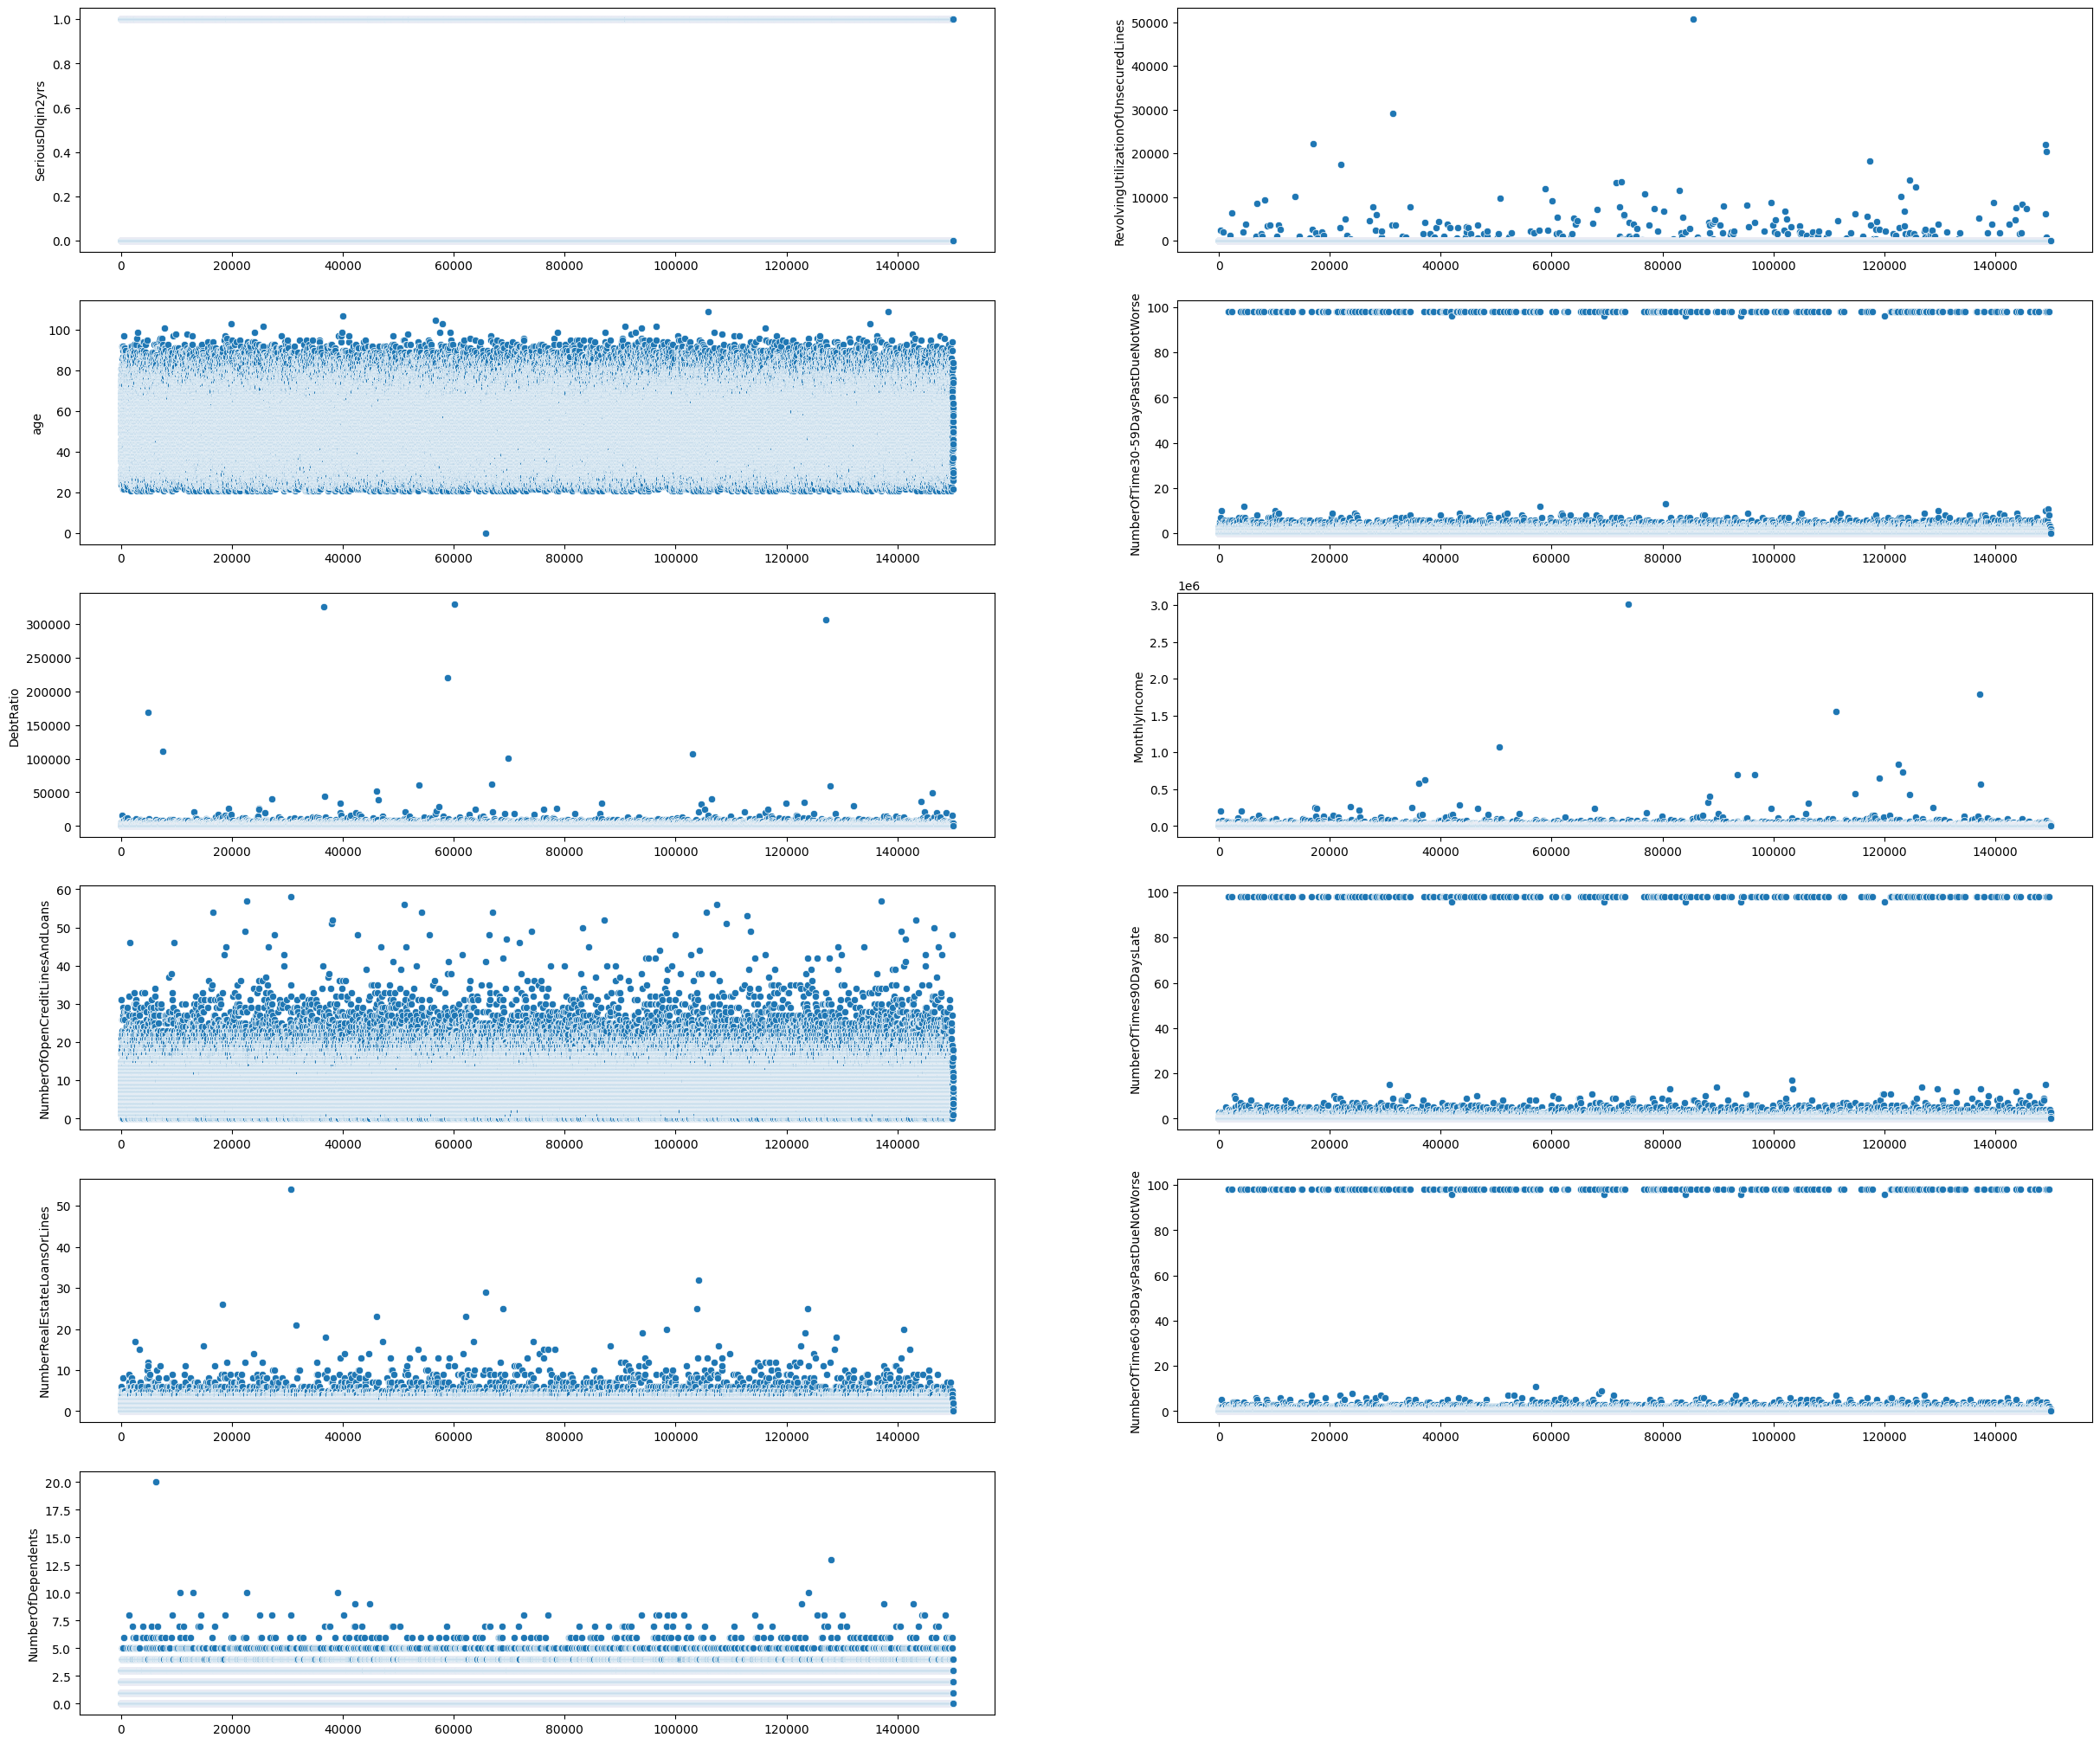

In [13]:
# Scatter plot of each feature to check for outliers
fig = plt.figure(figsize=(30, 30))
for i, feature in enumerate(train_data.columns):
    axes = fig.add_subplot(7, 2, i+1)
    sns.scatterplot(train_data[feature], ax=axes)
plt.show()

The scatterplots shows that the features 'NumberOfTime30-59DaysPastDueNotWorse' , 'NumberOfTime60-89DaysPastDueNotWorse' and 'NumberOfTimes90DaysLate' have similar distributions divided in two distinguished clusters [0, 20] and [90, 100].
<br>Intuitively, 90+ values seem unsual as most lenders would cut off access much earlier that 90+ days late in payements.

Thus we will cap these values (replace them by the maximum value that is inferior to 90).

The scatter graph also helps us vizualizing each feature's distribution.
<br><br>
- Other features present outliers :
    - 'MonthlyIncome': Explainable => huge monthly income
    - 'NumberOfDependents': Explainable => customer with many dependents
    - 'RevolvingUtilizationOfUnsecuredLines': presence of surprisingly very high values
    - 'DebtRatio': presence of surprisingly very high values
    - 'NumberOfOpenCreditLinesAndLoans' : Seems to have some outliers

<br>Need a more detailed analysis of feature distribution for 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines' and 'NumberOfOpenCreditLinesAndLoans'

<Figure size 3000x3000 with 0 Axes>

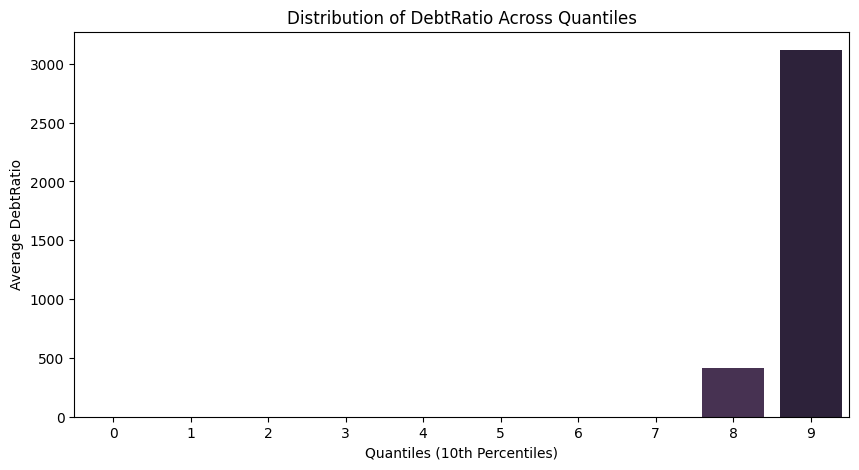

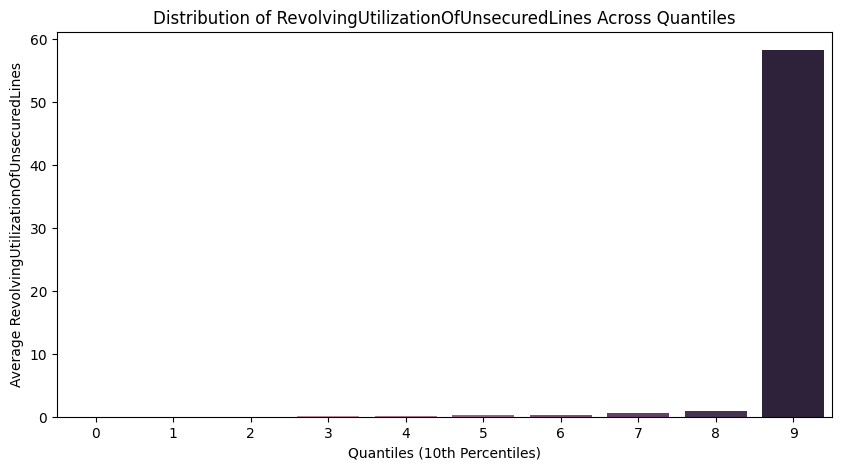

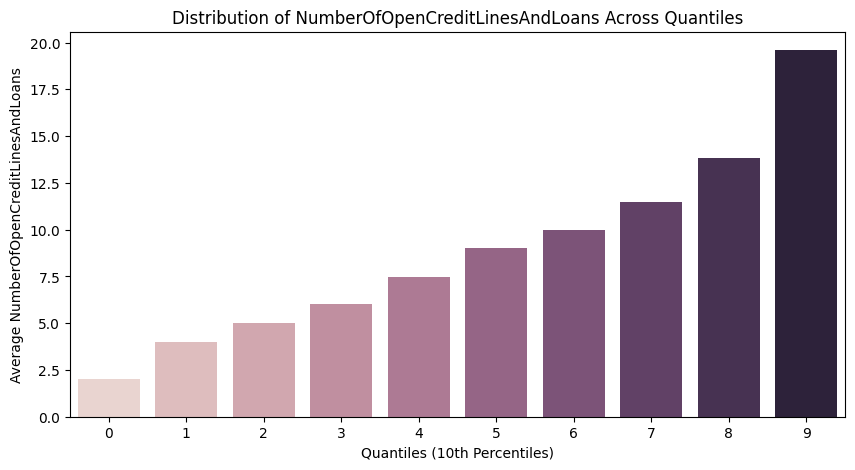

In [14]:
detailed_features = ['DebtRatio', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans']

fig = plt.figure(figsize=(30, 30))
# 10th Quantile Distribution of Detailed Features
for feature in detailed_features:
    train_data['quantile'] = pd.qcut(train_data[feature], q=10, labels=False, duplicates='drop')
    quantile_means = train_data.groupby('quantile')[feature].mean()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=quantile_means.index, y=quantile_means.values, hue=quantile_means.index, legend=False),
    plt.xlabel("Quantiles (10th Percentiles)")
    plt.ylabel(f"Average {feature}")
    plt.title(f"Distribution of {feature} Across Quantiles")
    plt.show()
    train_data.drop(columns=['quantile'], inplace=True)

- 'NumberOfOpenCreditLinesAndLoans': looks normal.
- 'DebtRatio': Big disproportion between high and low values peak on the 8th quantile
- 'RevolvingUtilizationOfUnsecuredLines': Big disproportion between high and low values peak on the 9th quantile

Let's take a closer look at those upper quantiles.

#### 'DebtRatio' Detailed Analysis

In [15]:
# Detailed Analysis of the 80th Percentile of 'DebtRatio'
debt_ratio_80th = train_data[train_data["DebtRatio"] >= train_data["DebtRatio"].quantile(0.80)]
debt_ratio_80th.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,30065.000000,30065.000000,30065.000000,30065.000000,30065.000000,2476.000000,30065.000000,30065.000000,30065.000000,30065.000000,26711.000000
mean,0.055147,6.824756,55.510294,0.286014,1759.780883,378.918821,7.610943,0.176518,0.943057,0.148013,0.376961
std,0.228271,219.363035,15.006384,3.047508,4271.297935,1784.447565,4.829849,3.023976,1.095046,3.004018,0.881342
min,0.000000,0.000000,21.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.020796,45.000000,0.000000,263.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.089390,56.000000,0.000000,1262.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.424725,66.000000,0.000000,2446.000000,1.000000,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,33333.000000,58.000000,98.000000,54.000000,98.000000,10.000000


We can see that there are a lot of 'MonthlyIncome' values missing, and 75% of the 'MonthlyIncome' values are 0 or 1, which looks like error in our data. 
<br>Let's take a closer look at those.

In [16]:
# Detailed Analysis of 'MonthlyIncome' values of 0 and 1 in the 80th Percentile of 'DebtRatio'
debt_ratio_80th[(debt_ratio_80th['MonthlyIncome'] == 0) | (debt_ratio_80th['MonthlyIncome'] == 1)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000
mean,0.035523,3.468856,48.656448,0.180535,1532.690024,0.265207,7.648662,0.057421,0.809246,0.048662,0.839416
std,0.185143,130.742371,15.394954,0.570289,2870.420298,0.441551,4.771320,0.422830,0.918602,0.344051,1.221961
min,0.000000,0.000000,21.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.026275,37.000000,0.000000,227.500000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.118547,47.000000,0.000000,960.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.454128,61.000000,0.000000,1972.000000,1.000000,10.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,5893.000000,103.000000,6.000000,61106.500000,1.000000,31.000000,11.000000,9.000000,9.000000,10.000000


As 0 and 1 are not usual values for 'MonthlyIncome', we can suspect that it is a data entry errors.
<br>Let's check how many lines have the same values for 'MonthlyIncome' and 'SeriousDlqin2yrs'.

In [17]:
# Detailed Analysis of 'MonthlyIncome' equal to 'SeriousDlqin2yrs' in the 80th Percentile of 'DebtRatio'
debt_ratio_80th[(debt_ratio_80th['MonthlyIncome'] == debt_ratio_80th['SeriousDlqin2yrs'])].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,0.009556,4.737850,49.296928,0.161092,1670.921160,0.009556,7.526280,0.035495,0.769966,0.034130,0.778157
std,0.097321,154.844133,16.044462,0.543203,2854.486299,0.097321,4.736589,0.298166,0.891474,0.302871,1.209847
min,0.000000,0.000000,21.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.022166,37.000000,0.000000,217.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.107684,48.000000,0.000000,1062.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.422975,62.000000,0.000000,2253.000000,0.000000,10.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,5893.000000,94.000000,6.000000,60212.000000,1.000000,31.000000,6.000000,7.000000,9.000000,10.000000


We realize that 1465/2055 values have the same values for 'MonthlyIncome' and 'SeriousDlqin2yrs' so we will consider these values as data entry errors as the create a lot of variance and will add bias to our predictions.
<br>Thus, we will remove these values.

#### 'RevolvingUtilizationOfUnsecuredLines' Detailed Analysis

In [18]:
# Detailed Analysis of the 90th Percentile of 'RevolvingUtilizationOfUnsecuredLines'
unsecured_lines_90th = train_data[train_data["RevolvingUtilizationOfUnsecuredLines"] >= train_data["RevolvingUtilizationOfUnsecuredLines"].quantile(0.9)]
unsecured_lines_90th.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,11484.000000,15000.000000,15000.000000,15000.000000,15000.0000,14488.000000
mean,0.231667,58.291581,45.042733,2.258733,254.413424,4821.263410,3.967933,2.203333,0.567133,1.9710,0.773192
std,0.421911,787.896798,14.573227,12.972898,1124.912584,5465.243822,3.609179,12.984371,0.904773,12.9858,1.142039
min,0.000000,0.981279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,0.000000,1.000000,33.000000,0.000000,0.081218,2353.500000,1.000000,0.000000,0.000000,0.0000,0.000000
50%,0.000000,1.000000,44.000000,0.000000,0.288875,3750.000000,3.000000,0.000000,0.000000,0.0000,0.000000
75%,0.000000,1.000000,55.000000,1.000000,0.827439,5850.000000,6.000000,1.000000,1.000000,0.0000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,61907.000000,251608.000000,42.000000,98.000000,25.000000,98.0000,13.000000


We can still see a big difference between the Q3 and the max value.
<br>Let's take a closer look to the values.

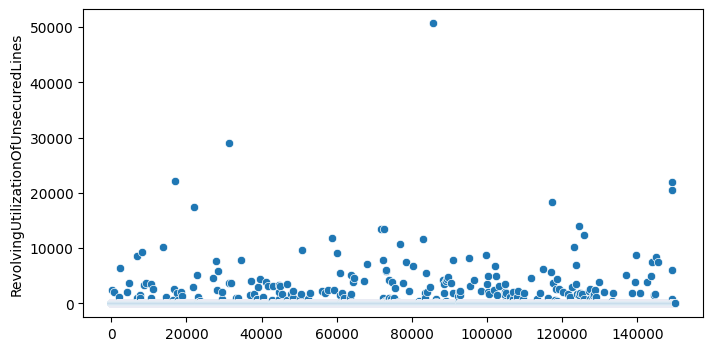

In [19]:
fig = plt.figure(figsize=(8, 4))
# Detailed Analysis of 'RevolvingUtilizationOfUnsecuredLines' 90th Percentile
sns.scatterplot(unsecured_lines_90th['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

It is suprinsing to have this much data that are very high as 'RevolvingUtilizationOfUnsecuredLines' is a ratio: <br>Total credit limit on credit cards / Total balance on credit cards.
<br>Acceptable values should be between [0, 1]; even though values > 1 are also possible but should be very rare cases.
<br>The most surprising part is that we see values that are surprisingly big.
<br>We will take a look at values that are > 2 (which is already an impressively high value) and see if they have any impact on our prediction.

(371, 11)


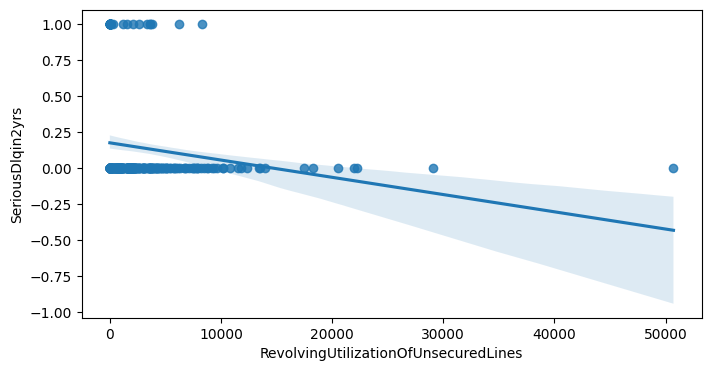

In [20]:
fig = plt.figure(figsize=(8, 4))
unsecured_lines_90th_2 = unsecured_lines_90th[unsecured_lines_90th['RevolvingUtilizationOfUnsecuredLines'] > 2]
print(unsecured_lines_90th_2.shape)
# Detailed Analysis of 'NumberOfOpenCreditLinesAndLoans' in the 90th Percentile of 'RevolvingUtilizationOfUnsecuredLines'
sns.regplot(x=unsecured_lines_90th_2['RevolvingUtilizationOfUnsecuredLines'], y=unsecured_lines_90th_2['SeriousDlqin2yrs'])
plt.show()

The regplot graph indicates that these values can have huge impact on our predictions. 
<br>Thus, we will consider them as data entry errors.

## Data Pre-Processing

### Data Cleaning

Cleaning data considering upper analysis conclusions

In [21]:
# Create copies of datasets for data cleaning
train_data_cleaned = train_data.copy()
test_data_cleaned = test_data.copy()

In [22]:
# Replace null values in 'MonthlyIncome' and 'NumberOfDependents'

# 'MonthlyIncome' is replaced by the median value as it is a continuous variable
train_data_cleaned.fillna({'MonthlyIncome': train_data_cleaned['MonthlyIncome'].median()}, inplace=True)
test_data_cleaned.fillna({'MonthlyIncome': test_data_cleaned['MonthlyIncome'].median()}, inplace=True)

# 'NumberOfDependents' is replaced by 0, we assume that the null values correspond to clients with no dependents
train_data_cleaned.fillna({'NumberOfDependents': 0}, inplace=True)
test_data_cleaned.fillna({'NumberOfDependents': 0}, inplace=True)

In [23]:
# Drop lines where 'age' is less than 18 as it is not possible to have a client with less than 18 years old
train_data_cleaned = train_data_cleaned[train_data_cleaned['age'] >= 18]
test_data_cleaned = test_data_cleaned[test_data_cleaned['age'] >= 18]

In [24]:
# Cap the outliers in 'NumberOfTime30-59DaysPastDueNotWorse' , 'NumberOfTime60-89DaysPastDueNotWorse' and 'NumberOfTimes90DaysLate'

# Set cap values
cap_3059_train = max(np.unique(train_data_cleaned[train_data_cleaned['NumberOfTime30-59DaysPastDueNotWorse']<90]['NumberOfTime30-59DaysPastDueNotWorse']))
cap_6089_train = max(np.unique(train_data_cleaned[train_data_cleaned['NumberOfTime60-89DaysPastDueNotWorse']<90]['NumberOfTime60-89DaysPastDueNotWorse']))
cap_90_train = max(np.unique(train_data_cleaned[train_data_cleaned['NumberOfTimes90DaysLate']<90]['NumberOfTimes90DaysLate']))

# Cap the outliers using the cap values
train_data_cleaned['NumberOfTime30-59DaysPastDueNotWorse'] = train_data_cleaned['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda x: cap_3059_train if x >= 90 else x)
train_data_cleaned['NumberOfTime60-89DaysPastDueNotWorse'] = train_data_cleaned['NumberOfTime60-89DaysPastDueNotWorse'].apply(lambda x: cap_6089_train if x >= 90 else x)
train_data_cleaned['NumberOfTimes90DaysLate'] = train_data_cleaned['NumberOfTimes90DaysLate'].apply(lambda x: cap_90_train if x >= 90 else x)

# Same for test dataset

# Set cap values
cap_3059_test = max(np.unique(test_data_cleaned[test_data_cleaned['NumberOfTime30-59DaysPastDueNotWorse']<90]['NumberOfTime30-59DaysPastDueNotWorse']))
cap_6089_test = max(np.unique(test_data_cleaned[test_data_cleaned['NumberOfTime60-89DaysPastDueNotWorse']<90]['NumberOfTime60-89DaysPastDueNotWorse']))
cap_90_test = max(np.unique(test_data_cleaned[test_data_cleaned['NumberOfTimes90DaysLate']<90]['NumberOfTimes90DaysLate']))

# Cap the outliers using the cap values
test_data_cleaned['NumberOfTime30-59DaysPastDueNotWorse'] = test_data_cleaned['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda x: cap_3059_test if x >= 90 else x)
test_data_cleaned['NumberOfTime60-89DaysPastDueNotWorse'] = test_data_cleaned['NumberOfTime60-89DaysPastDueNotWorse'].apply(lambda x: cap_6089_test if x >= 90 else x)
test_data_cleaned['NumberOfTimes90DaysLate'] = test_data_cleaned['NumberOfTimes90DaysLate'].apply(lambda x: cap_90_test if x >= 90 else x)

In [25]:
# Removing rows where 'DebpRatio' in the 80th percentile and 'MonthlyIncome' is equal to 'SeriousDlqin2yrs'
train_data_cleaned.drop(train_data_cleaned[(train_data_cleaned["DebtRatio"] >= train_data_cleaned["DebtRatio"].quantile(0.80)) & 
           (train_data_cleaned['MonthlyIncome'] == train_data_cleaned['SeriousDlqin2yrs'])].index, inplace=True)

# Removing rows where 'RevolvingUtilizationOfUnsecuredLines' in the 90th percentile and 'NumberOfOpenCreditLinesAndLoans' is greater than 2
train_data_cleaned.drop(train_data_cleaned[(train_data_cleaned["RevolvingUtilizationOfUnsecuredLines"] >= train_data_cleaned["RevolvingUtilizationOfUnsecuredLines"].quantile(0.90)) 
                           & (train_data_cleaned['NumberOfOpenCreditLinesAndLoans'] > 2)].index, inplace=True)

# Same for test dataset
test_data_cleaned.drop(test_data_cleaned[(test_data_cleaned["DebtRatio"] >= test_data_cleaned["DebtRatio"].quantile(0.80)) & 
           (test_data_cleaned['MonthlyIncome'] == test_data_cleaned['SeriousDlqin2yrs'])].index, inplace=True)

test_data_cleaned.drop(test_data_cleaned[(test_data_cleaned["RevolvingUtilizationOfUnsecuredLines"] >= test_data_cleaned["RevolvingUtilizationOfUnsecuredLines"].quantile(0.90))
                         & (test_data_cleaned['NumberOfOpenCreditLinesAndLoans'] > 2)].index, inplace=True)

In [26]:
train_data_cleaned.shape

(140057, 11)

In [27]:
test_data_cleaned.shape

(95657, 11)

Now we group both training and test sets to have a better view of our feature distribution

In [28]:
analyze_data = pd.concat([train_data_cleaned, test_data_cleaned])
# Drop target column ('SeriousDlqin2yrs')
analyze_data.drop(columns=['SeriousDlqin2yrs'], inplace=True)
analyze_data.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,235714.000000,235714.000000,235714.000000,235714.000000,2.357140e+05,235714.000000,235714.000000,235714.000000,235714.000000,235714.000000
mean,0.723666,52.711286,0.250278,341.646923,6.573730e+03,8.597847,0.105679,1.025629,0.072134,0.733860
std,56.373870,14.772041,0.959960,1908.207521,2.374514e+04,5.205489,0.886837,1.128088,0.538121,1.110247
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.026721,42.000000,0.000000,0.170232,4.000000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.129568,52.000000,0.000000,0.360259,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.462334,63.000000,0.000000,0.827910,7.500000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,20514.000000,109.000000,19.000000,329664.000000,7.727000e+06,85.000000,18.000000,54.000000,11.000000,43.000000


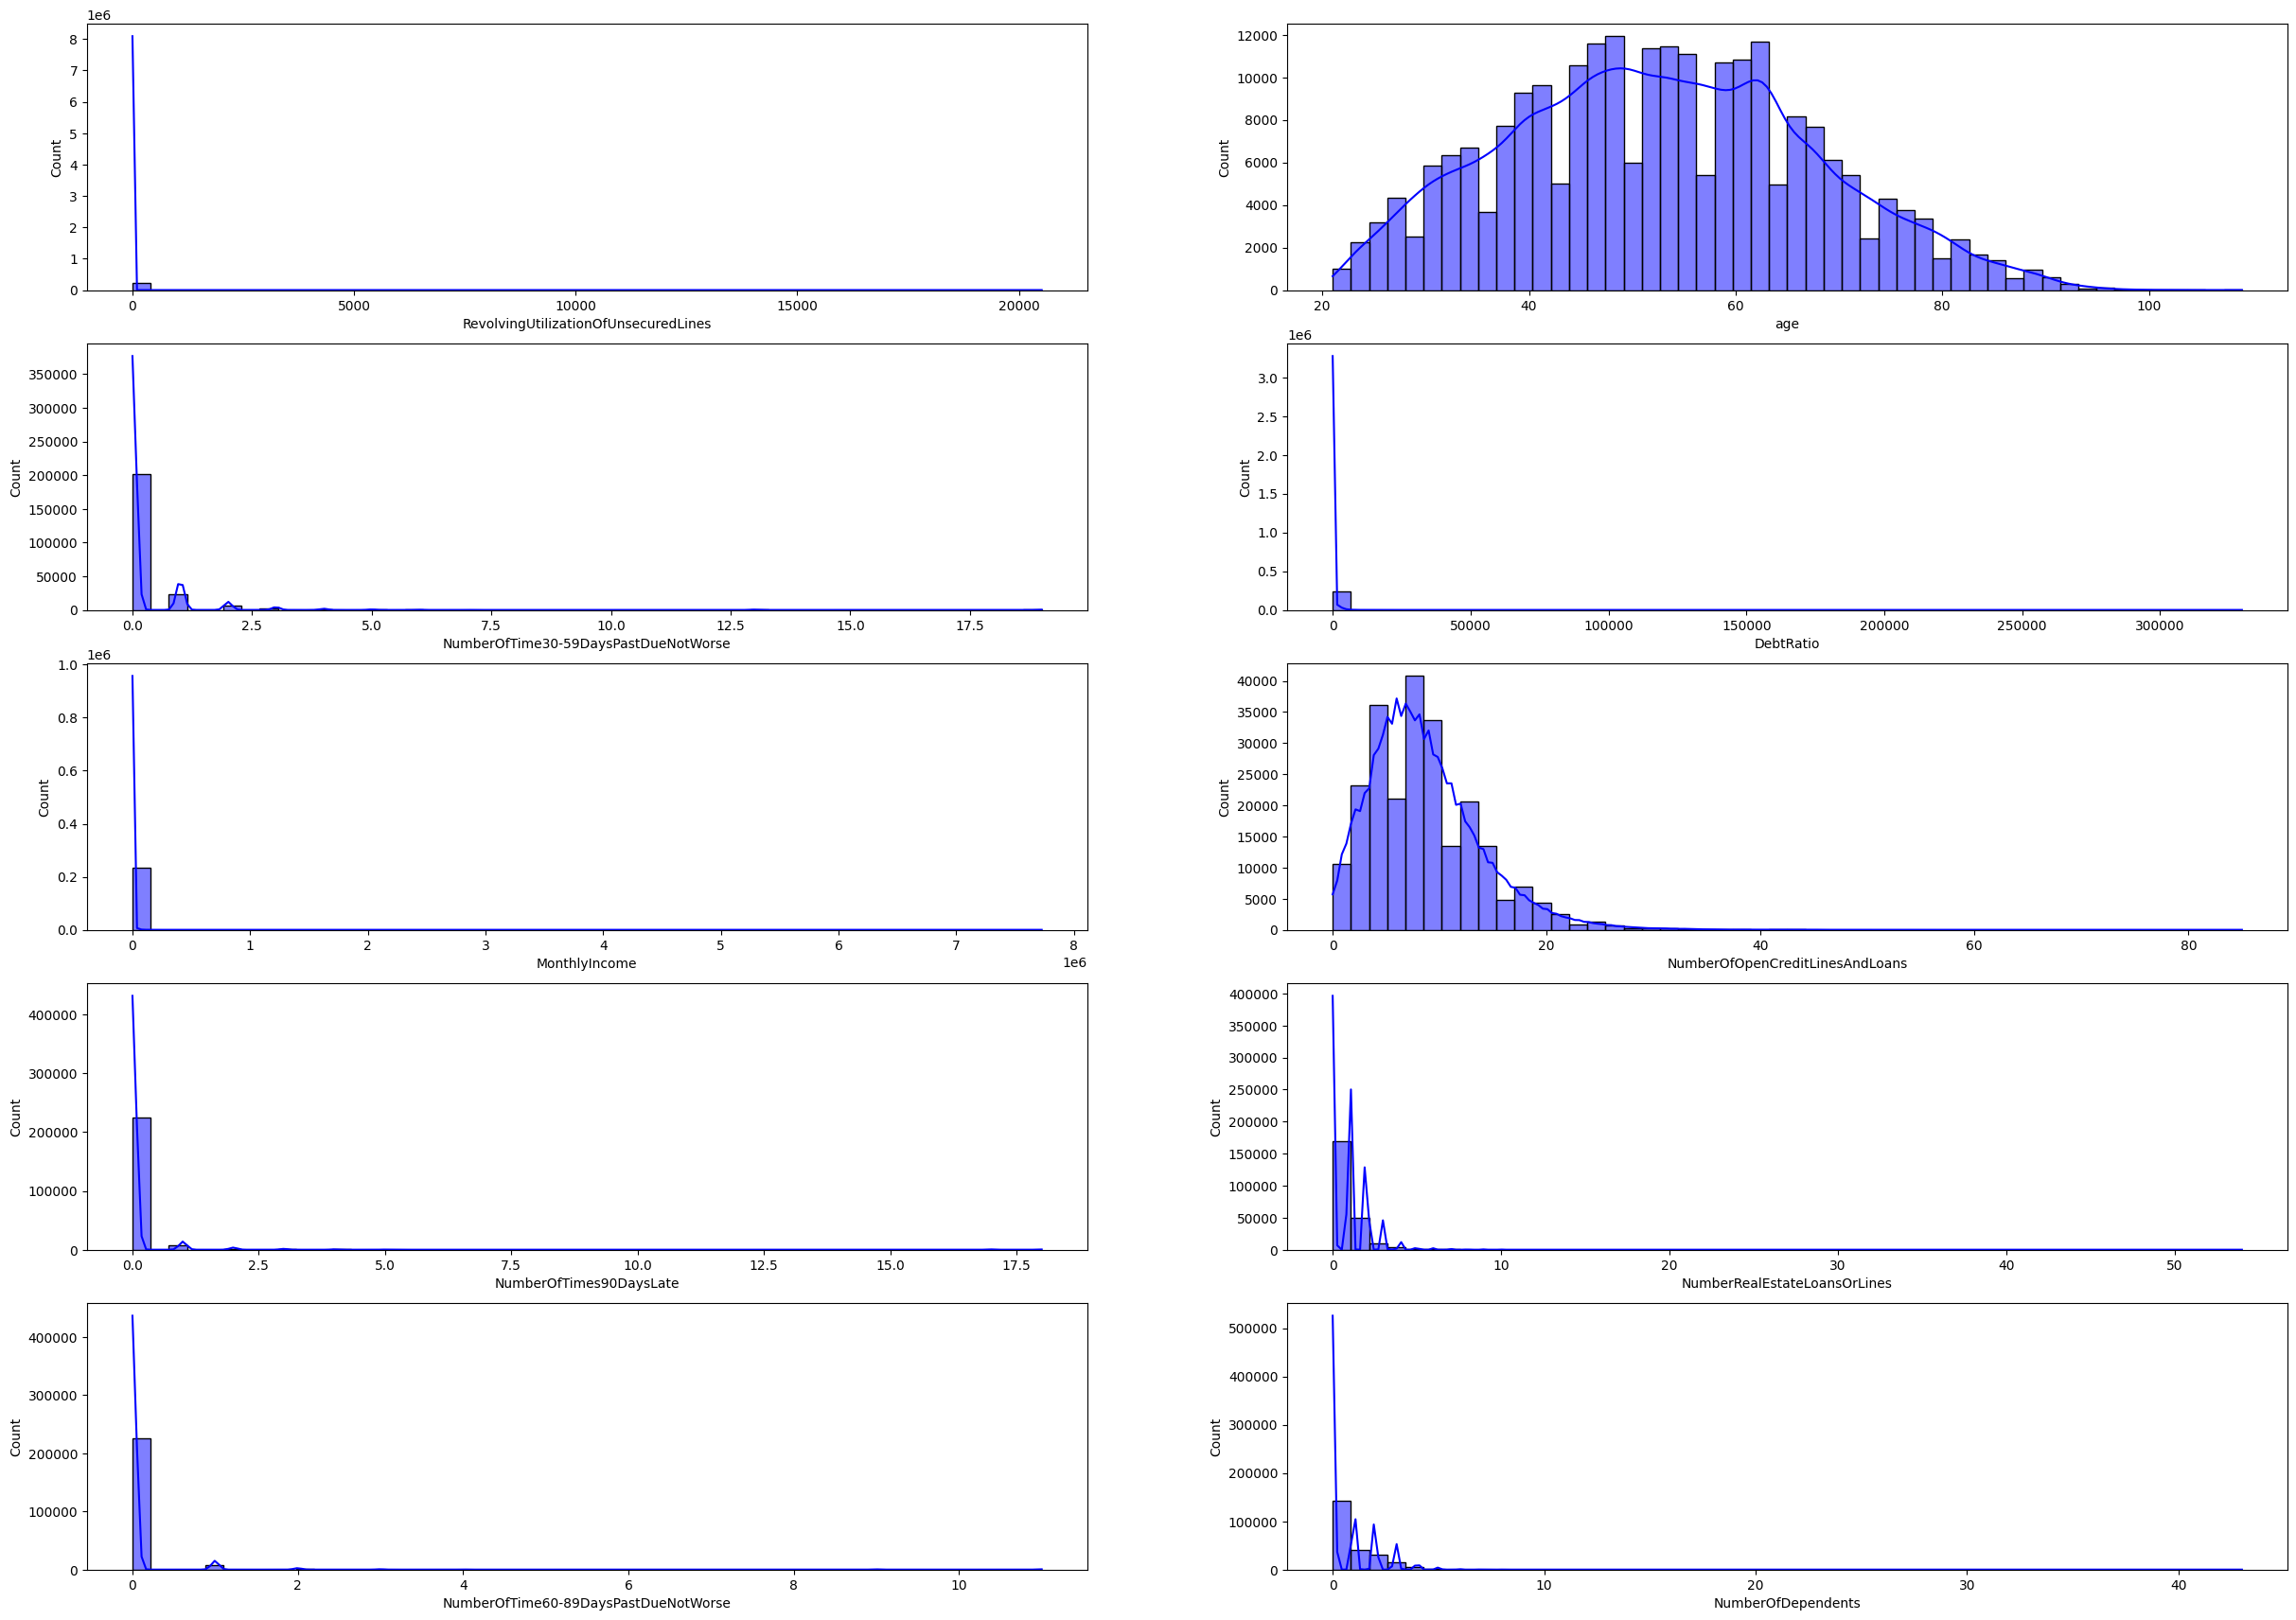

In [29]:
# Feature distribution of the cleaned dataset
fig = plt.figure(figsize=(30, 30))
for i, feature in enumerate(analyze_data.columns):
    axes = fig.add_subplot(7, 2, i+1)
    sns.histplot(analyze_data[feature], kde=True, ax=axes, bins=50, color='blue')

We can see that most features have very high skewness, only 'age' have an almost symetric distribution.

In [30]:
# Skewness of the features
skewness = analyze_data.skew()
skewness

RevolvingUtilizationOfUnsecuredLines    246.787478
age                                       0.166955
NumberOfTime30-59DaysPastDueNotWorse     10.737714
DebtRatio                                93.046471
MonthlyIncome                           212.790400
NumberOfOpenCreditLinesAndLoans           1.178414
NumberOfTimes90DaysLate                  16.371640
NumberRealEstateLoansOrLines              3.246002
NumberOfTime60-89DaysPastDueNotWorse     14.854834
NumberOfDependents                        1.857428
dtype: float64

## Data Normalization